# Blachole emission models

`synthesizer` can utilise several different black hole emission models, i.e. a model that translates a set of physical properties to one or several spectral energy distributions. 

In [10]:
from synthesizer.blackholes import UnifiedAGN
import matplotlib.pyplot as plt
import numpy as np
from unyt import deg

### `Template` model

Our simplest model is to just provide a template, either directly or from a file. This is simply scaled by the blackhole bolometric luminosity to produce the spectra.

### `UnifiedAGN` model

Our default model is the `UnifiedAGN` model. This combines a disc model with a model for the NLR, BLR, and torus.

This model is initialised with a `disc_model` (by default we use the model of Kubota and Done 2019  (https://ui.adsabs.harvard.edu/abs/2018MNRAS.480.1247K/abstract) and any additional fixed parameters.

In [11]:
grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids/dev'
emission_model = UnifiedAGN(disc_model='agnsed', grid_dir=grid_dir)

There are various parameter lists associated with this model, e.g.

In [12]:
emission_model.disc_parameters

['mass', 'accretion_rate_eddington', 'cosine_inclination']

In [13]:
emission_model.parameters

['mass',
 'accretion_rate_eddington',
 'cosine_inclination',
 'metallicity',
 'ionisation_parameter_blr',
 'hydrogen_density_blr',
 'covering_fraction_blr',
 'svelocity_dispersion_blr',
 'ionisation_parameter_nlr',
 'hydrogen_density_nlr',
 'covering_fraction_nlr',
 'velocity_dispersion_nlr',
 'theta_torus']

#### Generating spectra

We can generate spectra using the get_spectra command and passing the necessary parameters. In this case the blackhole mass, the accretion rate expressed as a fraction of the Eddington rate (`accretion_rate_eddington`), and the cosine of the inclination (`cosine_inclination`).  Other disc models have different parameters.

In [14]:
spectra = emission_model.get_spectra(mass=1E9, accretion_rate_eddington=1., cosine_inclination=0.5)

/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


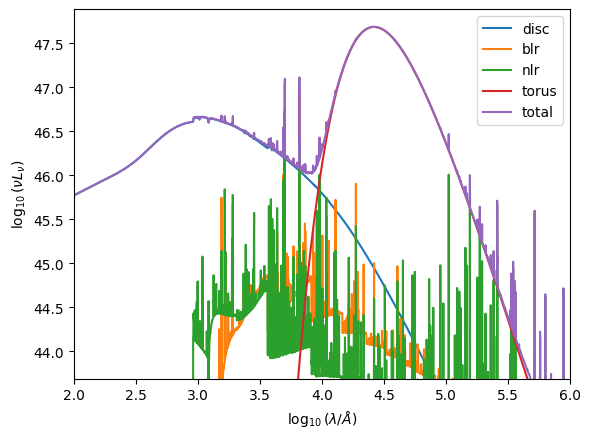

In [15]:
for id in ['disc', 'blr', 'nlr', 'torus', 'total']:

    sed = spectra[id]

    plt.plot(np.log10(sed.lam), np.log10(sed.luminosity), label = id)

plt.xlim([2,6])
plt.ylim(np.max(np.log10(emission_model.spectra['total'].luminosity))-4, np.max(np.log10(emission_model.spectra['total'].luminosity))+0.2)
plt.xlabel(r'$\log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\log_{10}(\nu L_{\nu})$')
plt.legend()
plt.show()